In [82]:
import pandas as pd 
import numpy as np
import optuna
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score

In [3]:
df = pd.read_csv('Cancer_Data.csv')

In [4]:
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

In [13]:
df.isnull().sum()
#no nulls

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [14]:
df.area_worst.max()

4254.0

In [16]:
df.area_worst.min()

185.2

In [18]:
df.diagnosis.describe()

count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object

In [27]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [28]:
df = pd.get_dummies(df, columns=["diagnosis"], drop_first=True)

In [29]:
df

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302        17.99         10.38          122.80     1001.0   
1      842517        20.57         17.77          132.90     1326.0   
2    84300903        19.69         21.25          130.00     1203.0   
3    84348301        11.42         20.38           77.58      386.1   
4    84358402        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564    926424        21.56         22.39          142.00     1479.0   
565    926682        20.13         28.25          131.20     1261.0   
566    926954        16.60         28.08          108.30      858.1   
567    927241        20.60         29.33          140.10     1265.0   
568     92751         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0           0.2419  ...          17.33           184.60      2019.0   
1           0.1812  ...          23.41           158.80      1956.0   
2           0.2069  ...          25.53           152.50      1709.0   
3           0.2597  ...          26.50            98.87       567.7   
4           0.1809  ...          16.67           152.20      1575.0   
..             ...  ...            ...              ...         ...   
564         0.1726  ...          26.40           166.10      2027.0   
565         0.1752  ...          38.25           155.00      1731.0   
566         0.1590  ...          34.12           126.70      1124.0   
567         0.2397  ...          39.42           184.60      1821.0   
568         0.1587  ...          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  \
0                  0.2654          0.4601                  0.11890   
1                  0.1860          0.2750                  0.08902   
2                  0.2430          0.3613                  0.08758   
3                  0.2575          0.6638                  0.17300   
4                  0.1625          0.2364                  0.07678   
..                    ...             ...                      ...   
564                0.2216          0.2060                  0.07115   
565                0.1628          0.2572                  0.06

In [30]:
X = df.drop("diagnosis_M", axis=1)
y = df['diagnosis_M']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 80, random_state = 42)

In [36]:
model_dt = DecisionTreeClassifier(criterion="entropy", random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [37]:
model_dt.predict(X_test)

array([False,  True,  True, False, False,  True,  True,  True,  True,
       False,  True,  True, False, False, False,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False,  True,  True, False, False,  True,  True,
       False, False,  True,  True,  True, False, False,  True,  True,
       False,  True, False, False,  True, False, False, False])

In [38]:
def explain_model(model,  X_train, X_test, y_train, y_test, features = None):
    print('Test Results:')
    y_pred = model.predict(X_test)
    print(classification_report(y_pred, y_test))
    print(confusion_matrix(y_pred, y_test))
    print('Train Results:')
    y_pred_tr = model.predict(X_train)
    print(classification_report(y_pred_tr, y_train))
    print(confusion_matrix(y_pred_tr, y_train))
    print('------------------')
    print('------------------')
    plt.figure(figsize=(20, 10))
    plot_tree(model, 
              filled=True,
              feature_names = features,
              class_names=True,
              rounded=True,
              fontsize=10)
    plt.title("Visualization", fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

Test Results:
              precision    recall  f1-score   support

       False       0.92      0.94      0.93        52
        True       0.89      0.86      0.87        28

    accuracy                           0.91        80
   macro avg       0.91      0.90      0.90        80
weighted avg       0.91      0.91      0.91        80

[[49  3]
 [ 4 24]]
Train Results:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       304
        True       1.00      1.00      1.00       185

    accuracy                           1.00       489
   macro avg       1.00      1.00      1.00       489
weighted avg       1.00      1.00      1.00       489

[[304   0]
 [  0 185]]
------------------
------------------


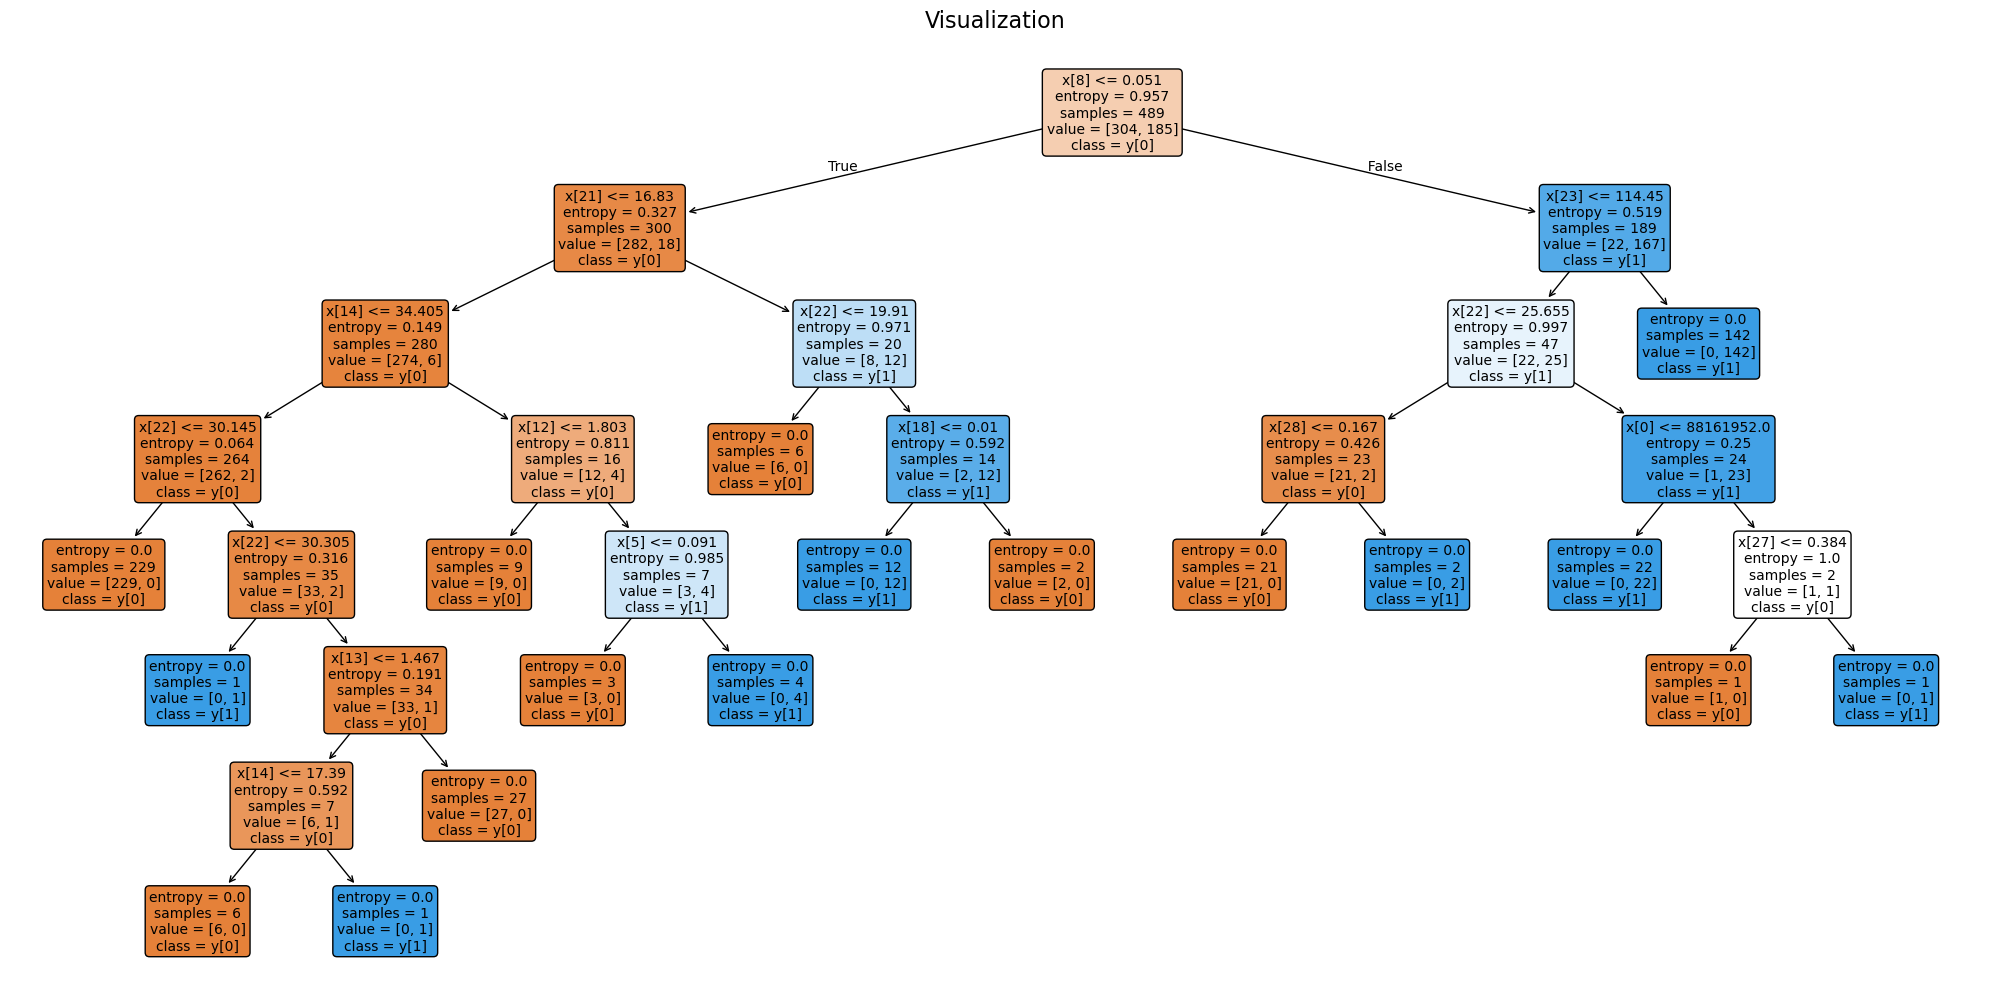

In [39]:
explain_model(model_dt, X_train, X_test, y_train, y_test)

In [40]:
#Theres a big overfitting, as we can see it divided a block with 1 sample in it. Tho the test result is good enough

In [41]:
def entropy(y):
    #H(X)=−i=1∑n P(xi)⋅log2(P(xi)) formula
    vals, counts = np.unique(y, return_counts=True)
    probs = counts / counts.sum()
    return -np.sum(probs * np.log2(probs))

In [46]:
diagnosisent = entropy(df['diagnosis_M'])

In [47]:
diagnosisent

np.float64(0.9526351224018599)

In [48]:
radius_meanent = entropy(df['radius_mean'])

In [49]:
radius_meanent

np.float64(8.733008172657566)

In [50]:
model_dt2 = DecisionTreeClassifier(criterion="gini",
    max_depth=5,           
    min_samples_leaf=5,    
    random_state=42)
model_dt2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

Test Results:
              precision    recall  f1-score   support

       False       1.00      0.95      0.97        56
        True       0.89      1.00      0.94        24

    accuracy                           0.96        80
   macro avg       0.94      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80

[[53  3]
 [ 0 24]]
Train Results:
              precision    recall  f1-score   support

       False       0.99      0.97      0.98       309
        True       0.96      0.98      0.97       180

    accuracy                           0.98       489
   macro avg       0.97      0.98      0.98       489
weighted avg       0.98      0.98      0.98       489

[[301   8]
 [  3 177]]
------------------
------------------


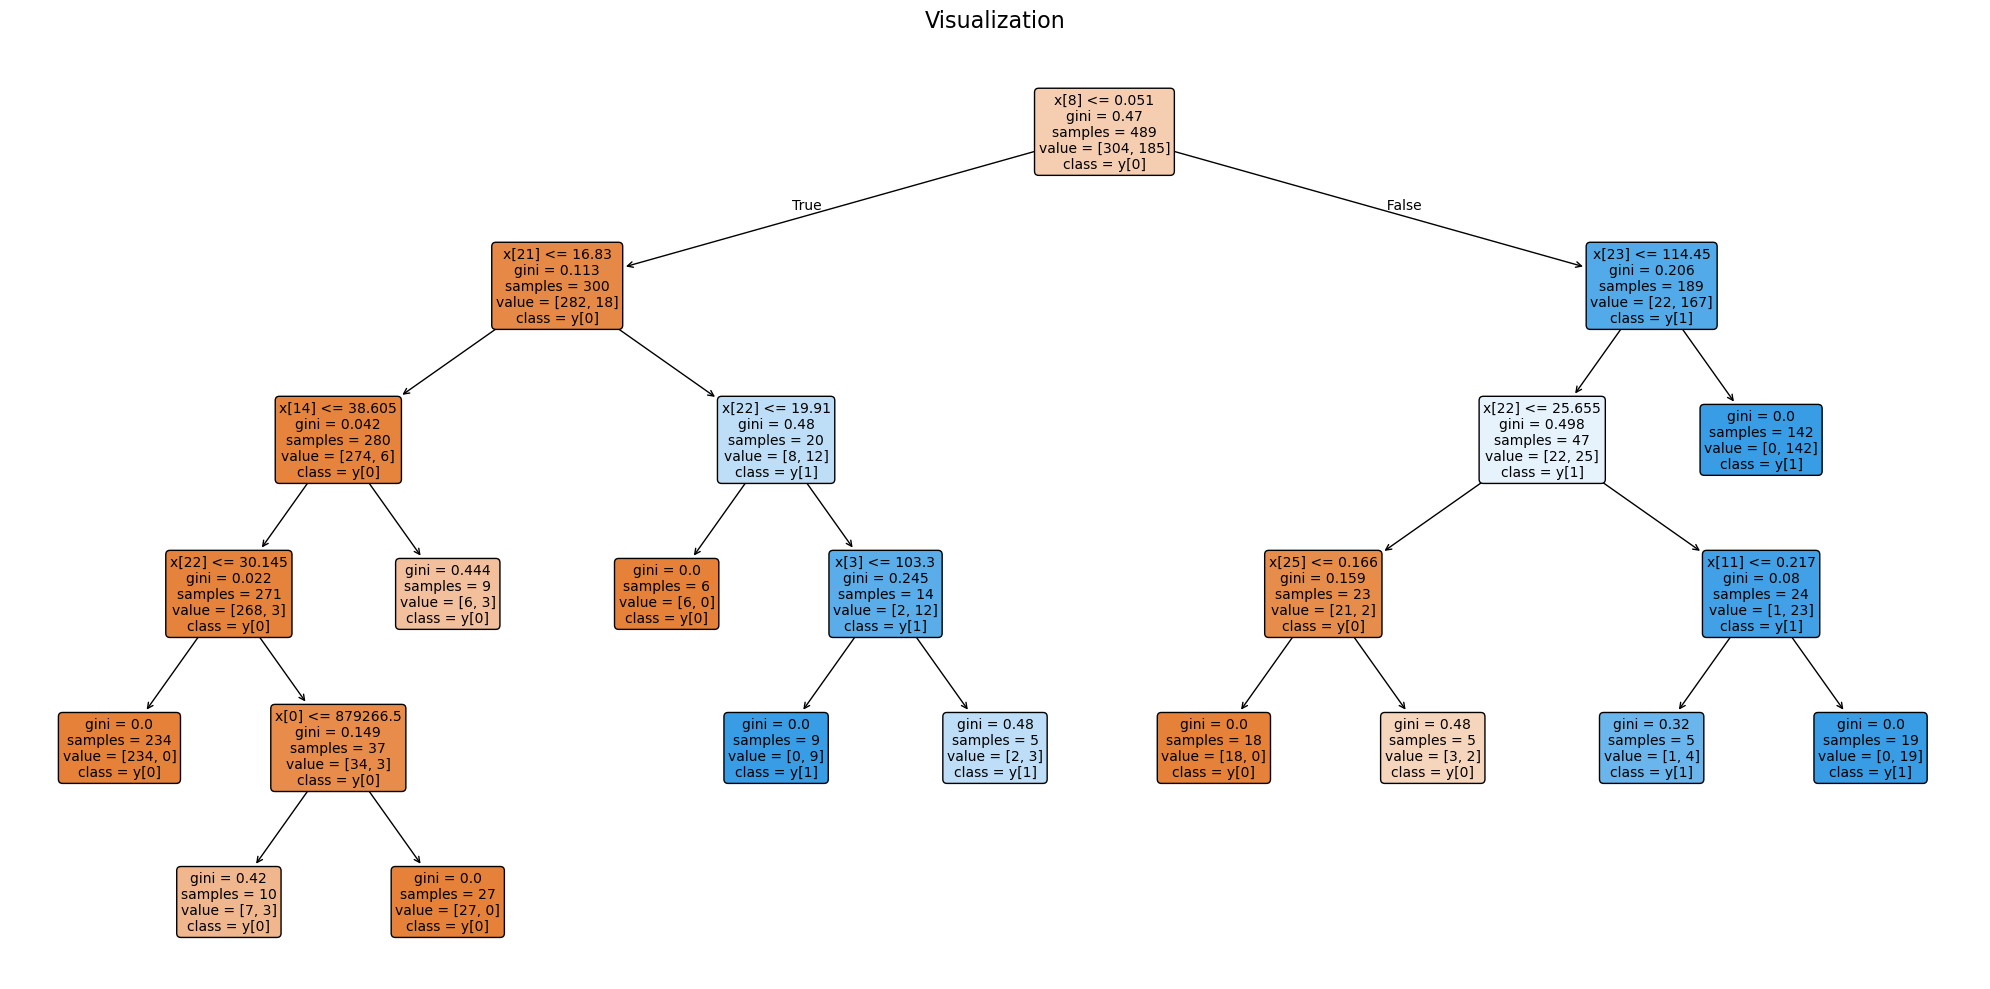

In [52]:
explain_model(model_dt2, X_train, X_test, y_train, y_test)

In [53]:
#Overfitting is still there but the test accuracy is better now 

In [54]:
model_dt3 = DecisionTreeClassifier(criterion="log_loss",
    max_depth=4,           
    min_samples_leaf=4,    
    random_state=42)
model_dt3.fit(X_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=4, min_samples_leaf=4,
                       random_state=42)

Test Results:
              precision    recall  f1-score   support

       False       1.00      0.95      0.97        56
        True       0.89      1.00      0.94        24

    accuracy                           0.96        80
   macro avg       0.94      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80

[[53  3]
 [ 0 24]]
Train Results:
              precision    recall  f1-score   support

       False       0.99      0.98      0.98       306
        True       0.97      0.98      0.97       183

    accuracy                           0.98       489
   macro avg       0.98      0.98      0.98       489
weighted avg       0.98      0.98      0.98       489

[[300   6]
 [  4 179]]
------------------
------------------


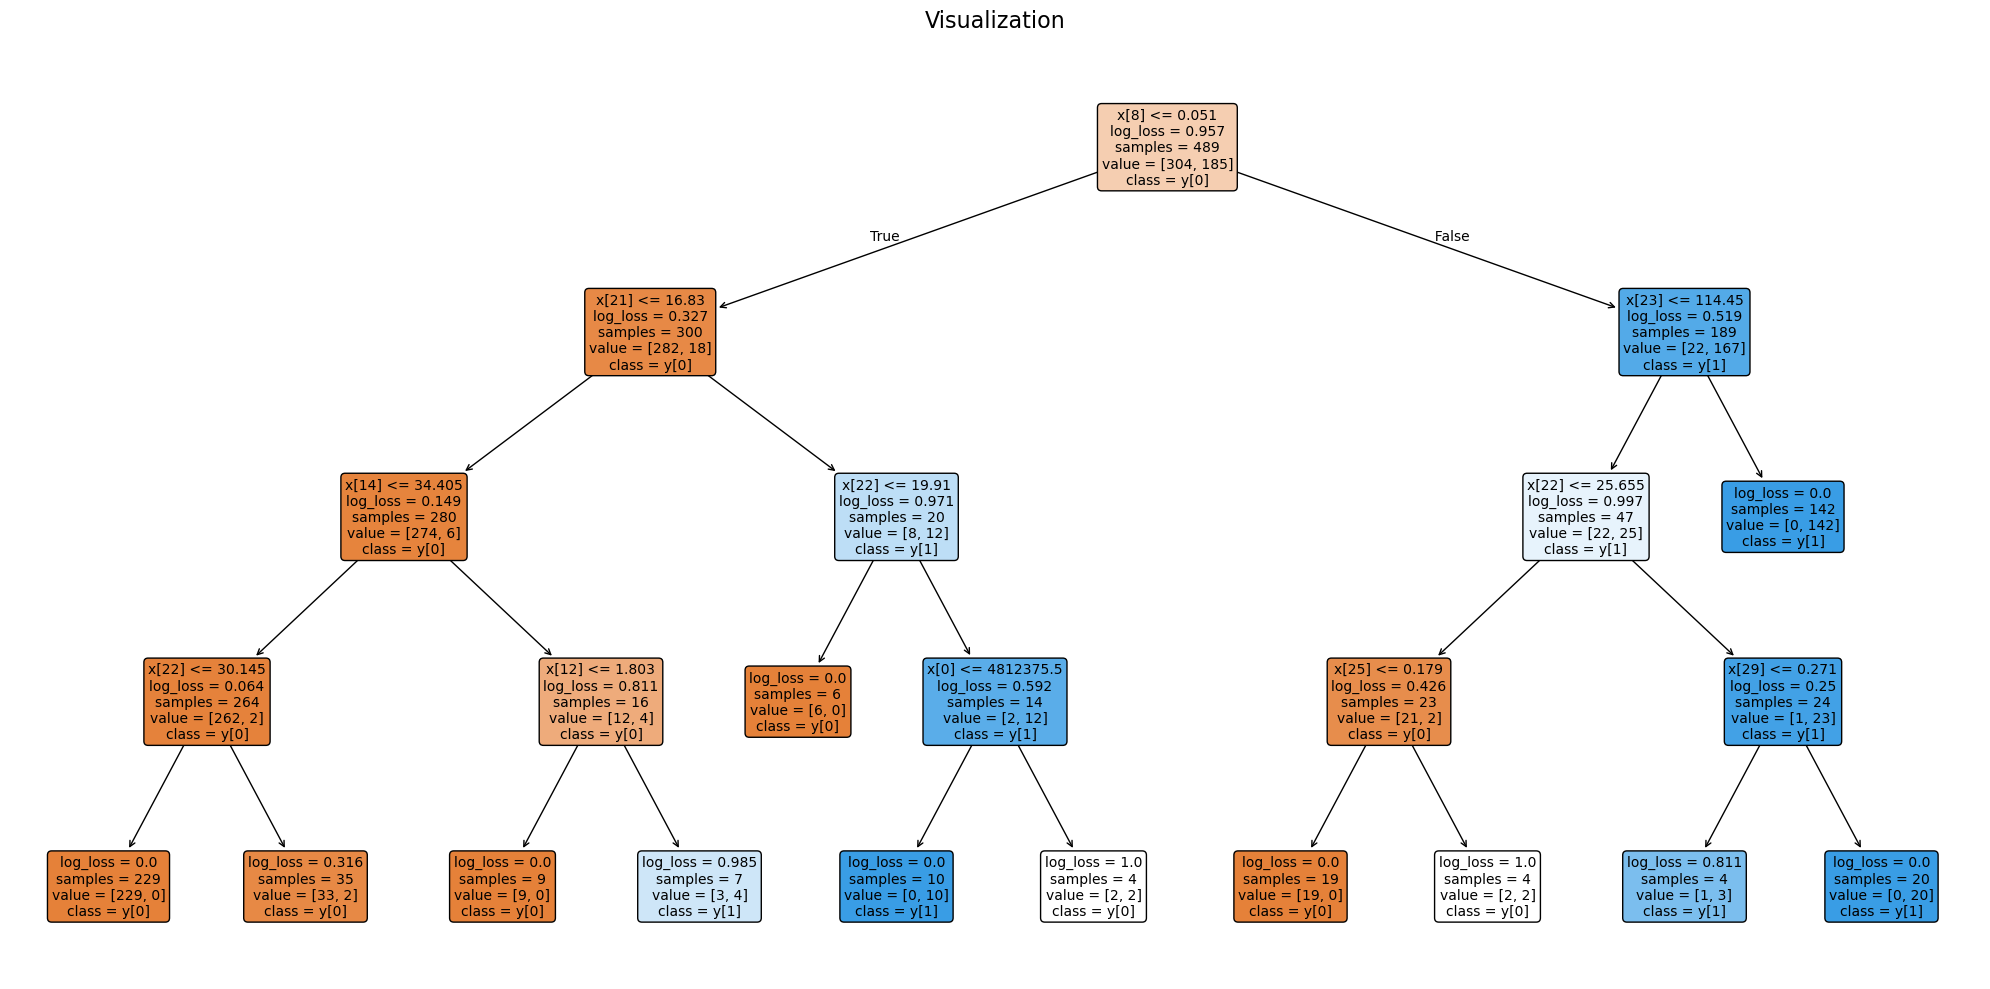

In [55]:
explain_model(model_dt3, X_train, X_test, y_train, y_test)

In [56]:
#Almost same result as previous, good test and train results as the columns given in the df is very good and calculatable for the model

In [59]:
new_df = pd.read_csv('synthetic_cancer_full.csv')

In [60]:
new_df

id  radius_mean  texture_mean  perimeter_mean   area_mean  \
0      1    14.261141     20.995298      101.531139  433.413623   
1      2    13.102978     16.998916       96.225003  862.840567   
2      3    14.275282     20.349010      151.577616  740.351759   
3      4     8.037293     18.073432      112.391498  790.733264   
4      5    13.340984     20.567587       87.441648  708.250810   
..   ...          ...           ...             ...         ...   
195  196     9.692414      8.490394       48.532195  480.255413   
196  197    17.489491     12.424045       83.146248  393.102116   
197  198    14.030699     26.834371       82.571183  490.360494   
198  199    11.055474     28.224839       61.849766  595.030954   
199  200    15.386310     18.754820       74.443666  869.183680   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           0.089648          0.122171        0.265966             0.096372   
1           0.104476          0.178594        0.169666             0.112586   
2           0.099672          0.275038        0.159602             0.073375   
3           0.123768          0.242511        0.134544             0.086876   
4           0.150539          0.182567        0.156677             0.121671   
..               ...               ...             ...                  ...   
195         0.109541          0.230457        0.119511             0.088995   
196         0.101536          0.145384        0.143299             0.088247   
197         0.074340          0.184180        0.150734             0.072328   
198         0.119925          0.260655        0.110755             0.148461   
199         0.090125          0.207086        0.182414             0.090330   

     symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
0         0.260858  ...      21.409375        98.470757   938.553806   
1         0.276066  ...      19.200473       128.914117  1021.166613   
2         0.249916  ...      24.591259        75.137623   972.287305   
3         0.178419  ...      27.183824       136.347289   850.263330   
4         0.220187  ...      37.559188        80.136927   753.739811   
..             ...  ...            ...              ...          ...   
195       0.189254  ...      32.702901        69.216622  1072.023180   
196       0.184598  ...      32.769914       122.006513   551.091500   
197       0.238983  ...      28.265322        83.622308   846.573617   
198       0.265515  ...      30.074817       130.569570   678.398771   
199       0.269784  ...      28.084375        85.933725   597.104055   

     smoothness_worst  compactness_worst  concavity_worst  \
0            0.079798           0.302890         0.132361   
1            0.132967           0.372601         0.148978   
2            0.099559           0.323411         0.187930   
3            0.149035           0.403465         0.256317   
4            0.149813           0.230449         0.198713   
..                ...                ...              ...   
195          0.113410           0.481154         0.280539   
196          0.138286           0.216019         0.220131   
197          0.073339           0.348924         0.209984   
198          0.126025           0.271314         0.236412   
199          0.123024           0.354835         0.380939   

     concave points_worst  symmetry_worst  fractal_dimension_worst  \
0                0.142668        0.310777                 0.047644   
1                0.149208        0.380709                 0.087616   
2                0.130707        0.321584                 0.063652   
3                0.193959        0.270082                 0.086426   
4                0.228393        0.242929                 0.031927   
..                    ...             ...                      ...   
195              0.151840        0.312499                 0.049829   
196              0.124355        0.321622                 0.083699   
197              0.26297

In [61]:
X_new = new_df.drop(columns=["id", "diagnosis_M"])  
y_new = new_df["diagnosis_M"]

In [62]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_dt.fit(X_new_train, y_new_train)
y_new_pred = model_dt.predict(X_new_test)

In [63]:
y_new_pred

array([False,  True,  True, False, False,  True,  True,  True,  True,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False,  True,  True, False, False,  True,  True,
       False, False, False,  True,  True, False, False,  True,  True,
       False,  True, False, False, False, False, False, False,  True,
       False, False,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False,  True,  True, False,
        True,  True, False,  True,  True, False, False, False,  True,
       False, False,  True, False, False,  True])

Test Results:
              precision    recall  f1-score   support

       False       0.99      0.95      0.97        74
        True       0.91      0.97      0.94        40

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

[[70  4]
 [ 1 39]]
Train Results:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       286
        True       1.00      1.00      1.00       169

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

[[286   0]
 [  0 169]]
------------------
------------------


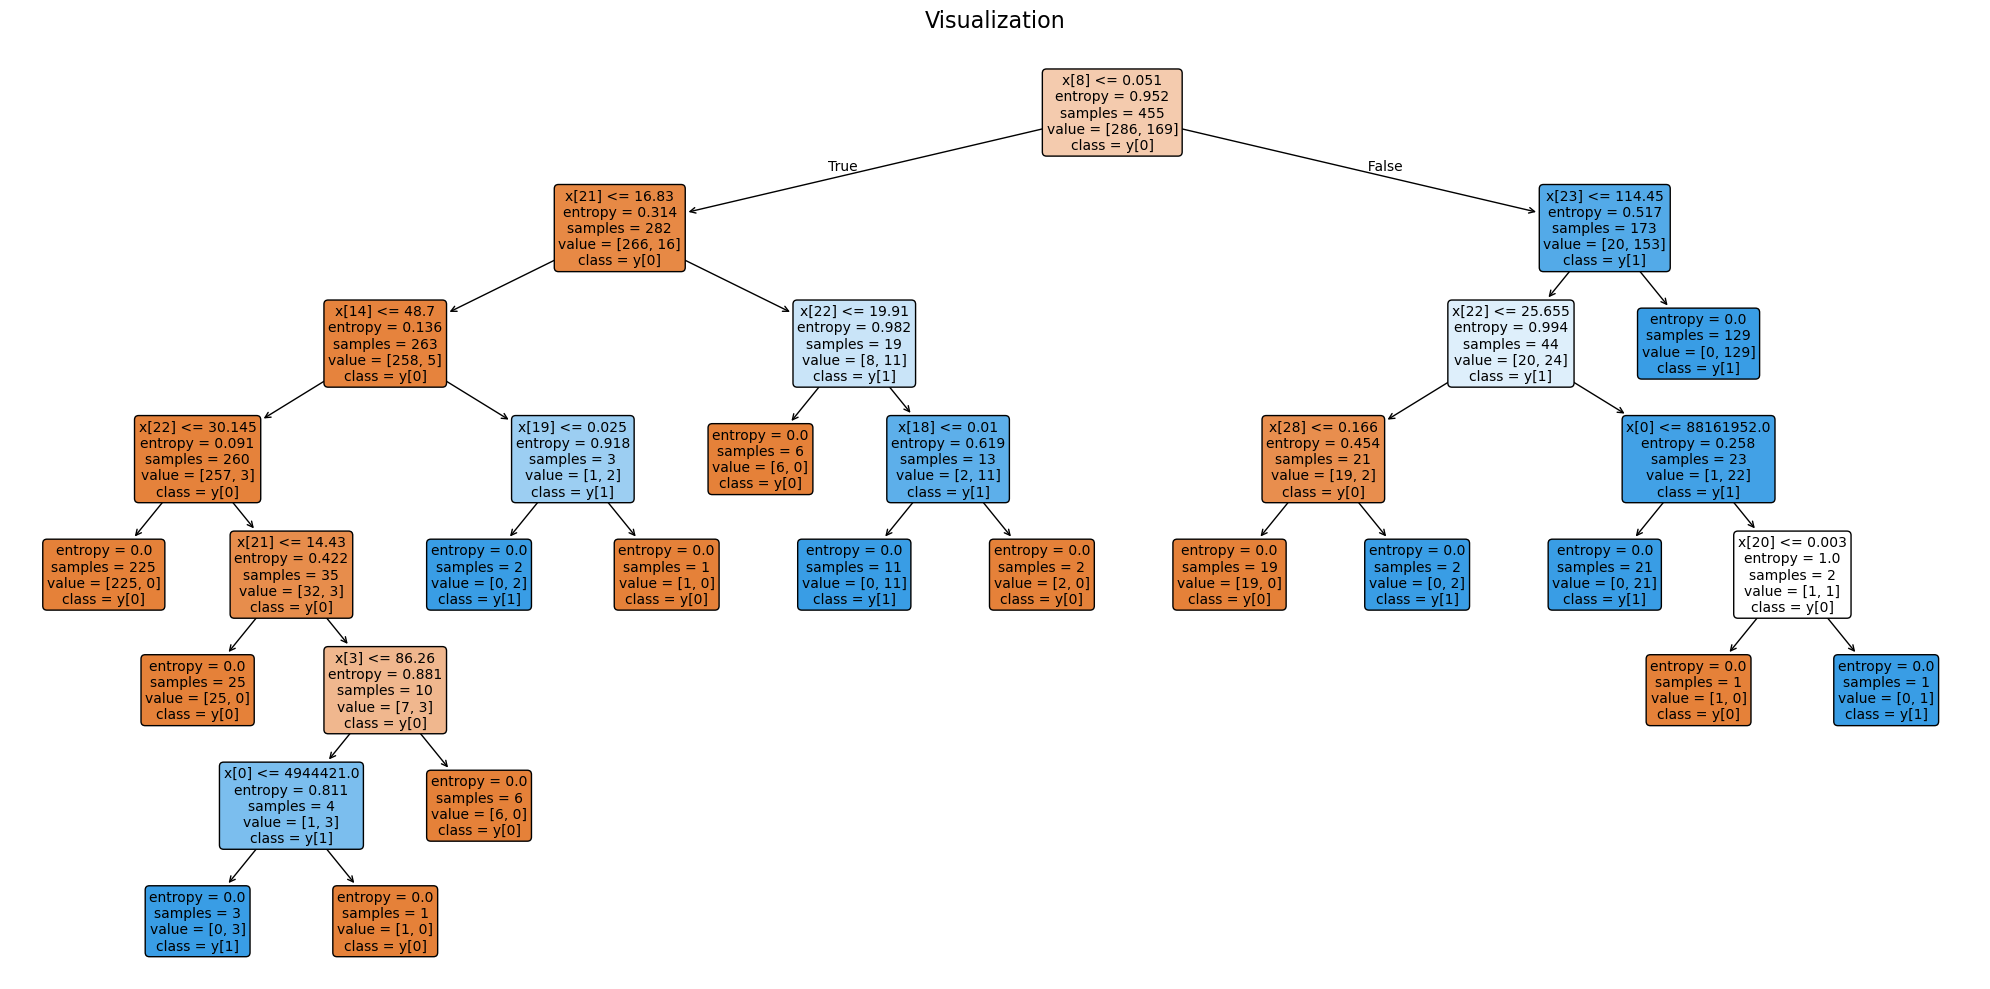

In [65]:
explain_model(model_dt, X_new_train, X_new_test, y_new_train, y_new_test)

In [66]:
#This model worked great for a new 200 samples of data. SLightly overfitting tho

In [67]:
param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": list(range(3, 8)),
    "min_samples_split": [2, 3, 4, 5, 7, 9, 10,13, 15, 17, 20],
    "min_samples_leaf": [ 2,3,4, 5,6 ,7 ,8 ,9, 10,12]
}

model_gs = DecisionTreeClassifier()

gs = GridSearchCV(
    estimator=model_gs,
    param_grid=param_grid,
    scoring="accuracy",   
    cv=5,
    n_jobs=-1,
    verbose=1
)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 1650 candidates, totalling 8250 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 12],
                         'min_samples_split': [2, 3, 4, 5, 7, 9, 10, 13, 15, 17,
                                               20]},
             scoring='accuracy', verbose=1)

In [68]:
modelgs = DecisionTreeClassifier( **gs.best_params_)

In [69]:
modelgs.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=6,
                       min_samples_split=4)

Test Results:
              precision    recall  f1-score   support

       False       0.98      0.95      0.96        55
        True       0.89      0.96      0.92        25

    accuracy                           0.95        80
   macro avg       0.94      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80

[[52  3]
 [ 1 24]]
Train Results:
              precision    recall  f1-score   support

       False       0.98      0.99      0.98       302
        True       0.98      0.97      0.97       187

    accuracy                           0.98       489
   macro avg       0.98      0.98      0.98       489
weighted avg       0.98      0.98      0.98       489

[[298   4]
 [  6 181]]
------------------
------------------


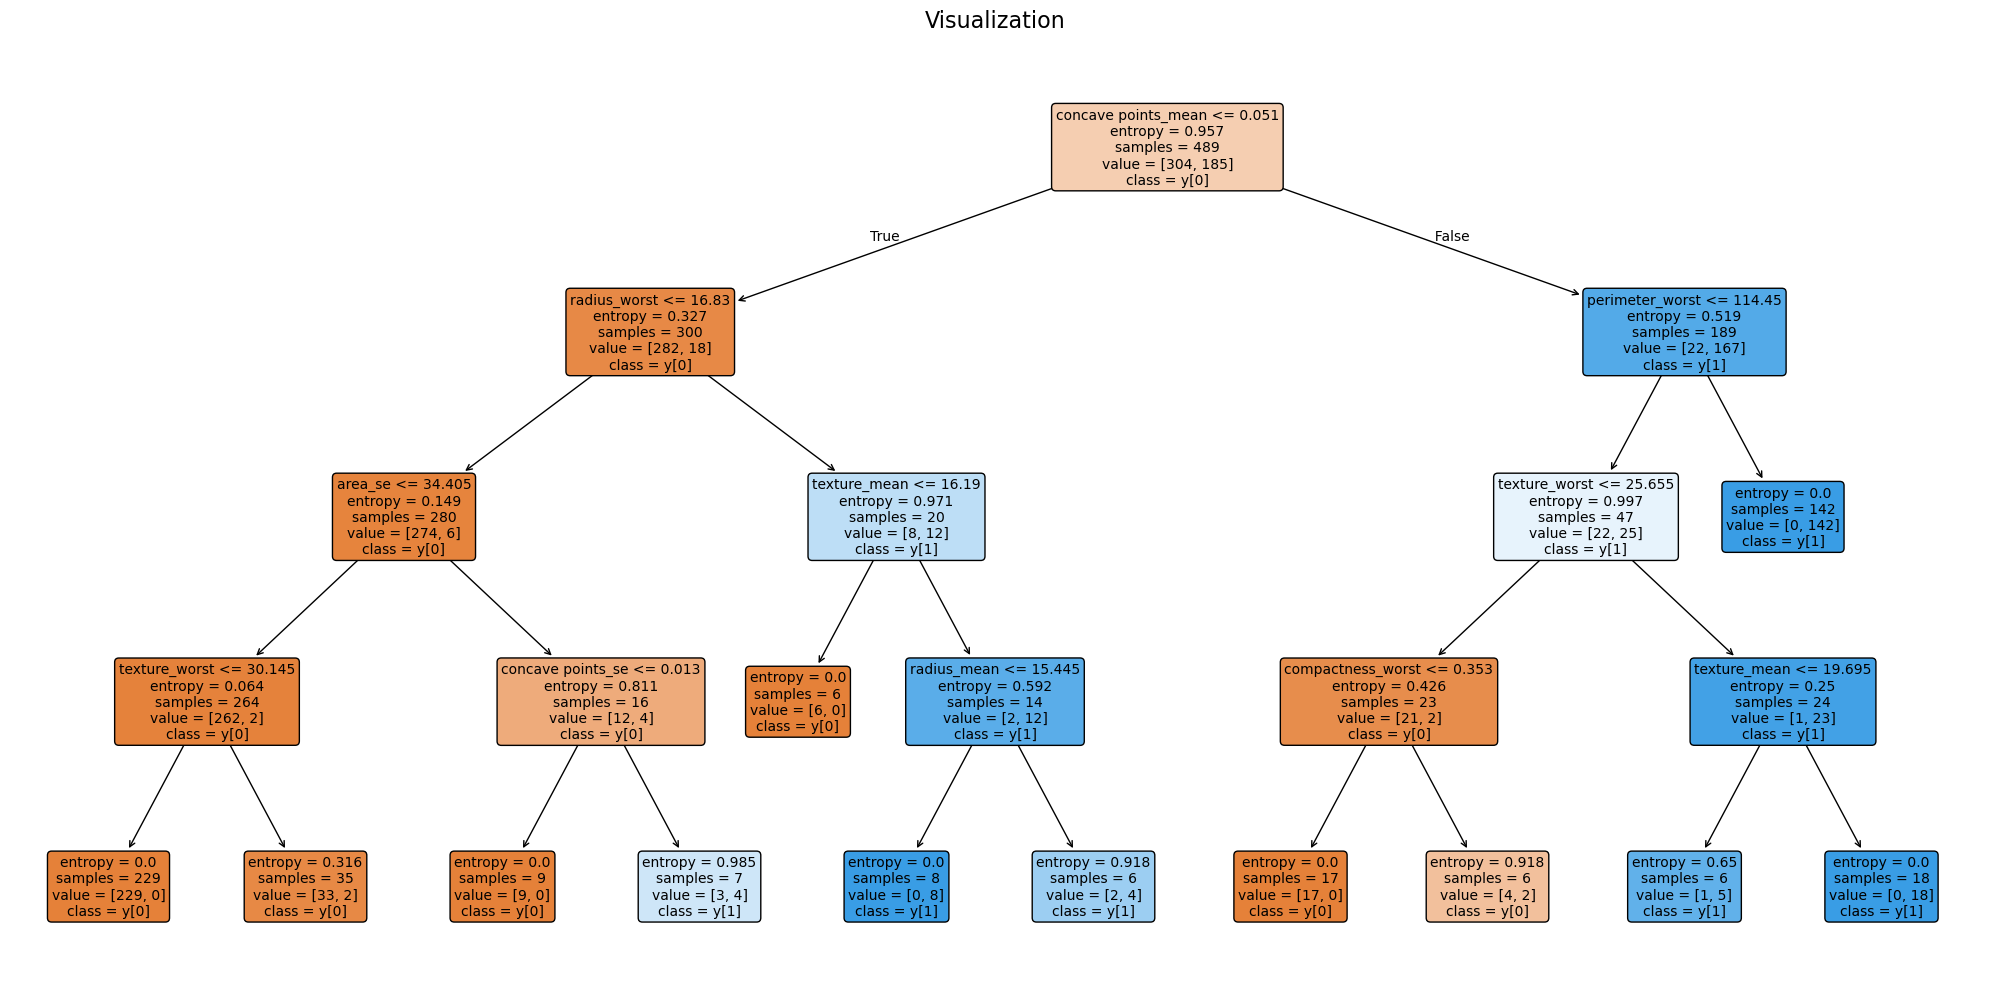

In [70]:
explain_model(modelgs, X_train, X_test, y_train, y_test, features = X_train.columns)

In [71]:
#Grid search worked great on this df

In [72]:
param_dist = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": randint(1, 11),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(4, 15)
}
rs = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=param_dist,
    n_iter=150,             
    scoring="f1",
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
rs.fit(X, y)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000023397CCBCB0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002339835D590>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002339835D310>},
                   random_state=42, scoring='f1', verbose=1)

In [73]:
model_rs= DecisionTreeClassifier(**rs.best_params_)

In [74]:
model_rs.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5)

Test Results:
              precision    recall  f1-score   support

       False       0.98      0.95      0.96        55
        True       0.89      0.96      0.92        25

    accuracy                           0.95        80
   macro avg       0.94      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80

[[52  3]
 [ 1 24]]
Train Results:
              precision    recall  f1-score   support

       False       0.98      0.99      0.98       302
        True       0.98      0.97      0.97       187

    accuracy                           0.98       489
   macro avg       0.98      0.98      0.98       489
weighted avg       0.98      0.98      0.98       489

[[298   4]
 [  6 181]]
------------------
------------------


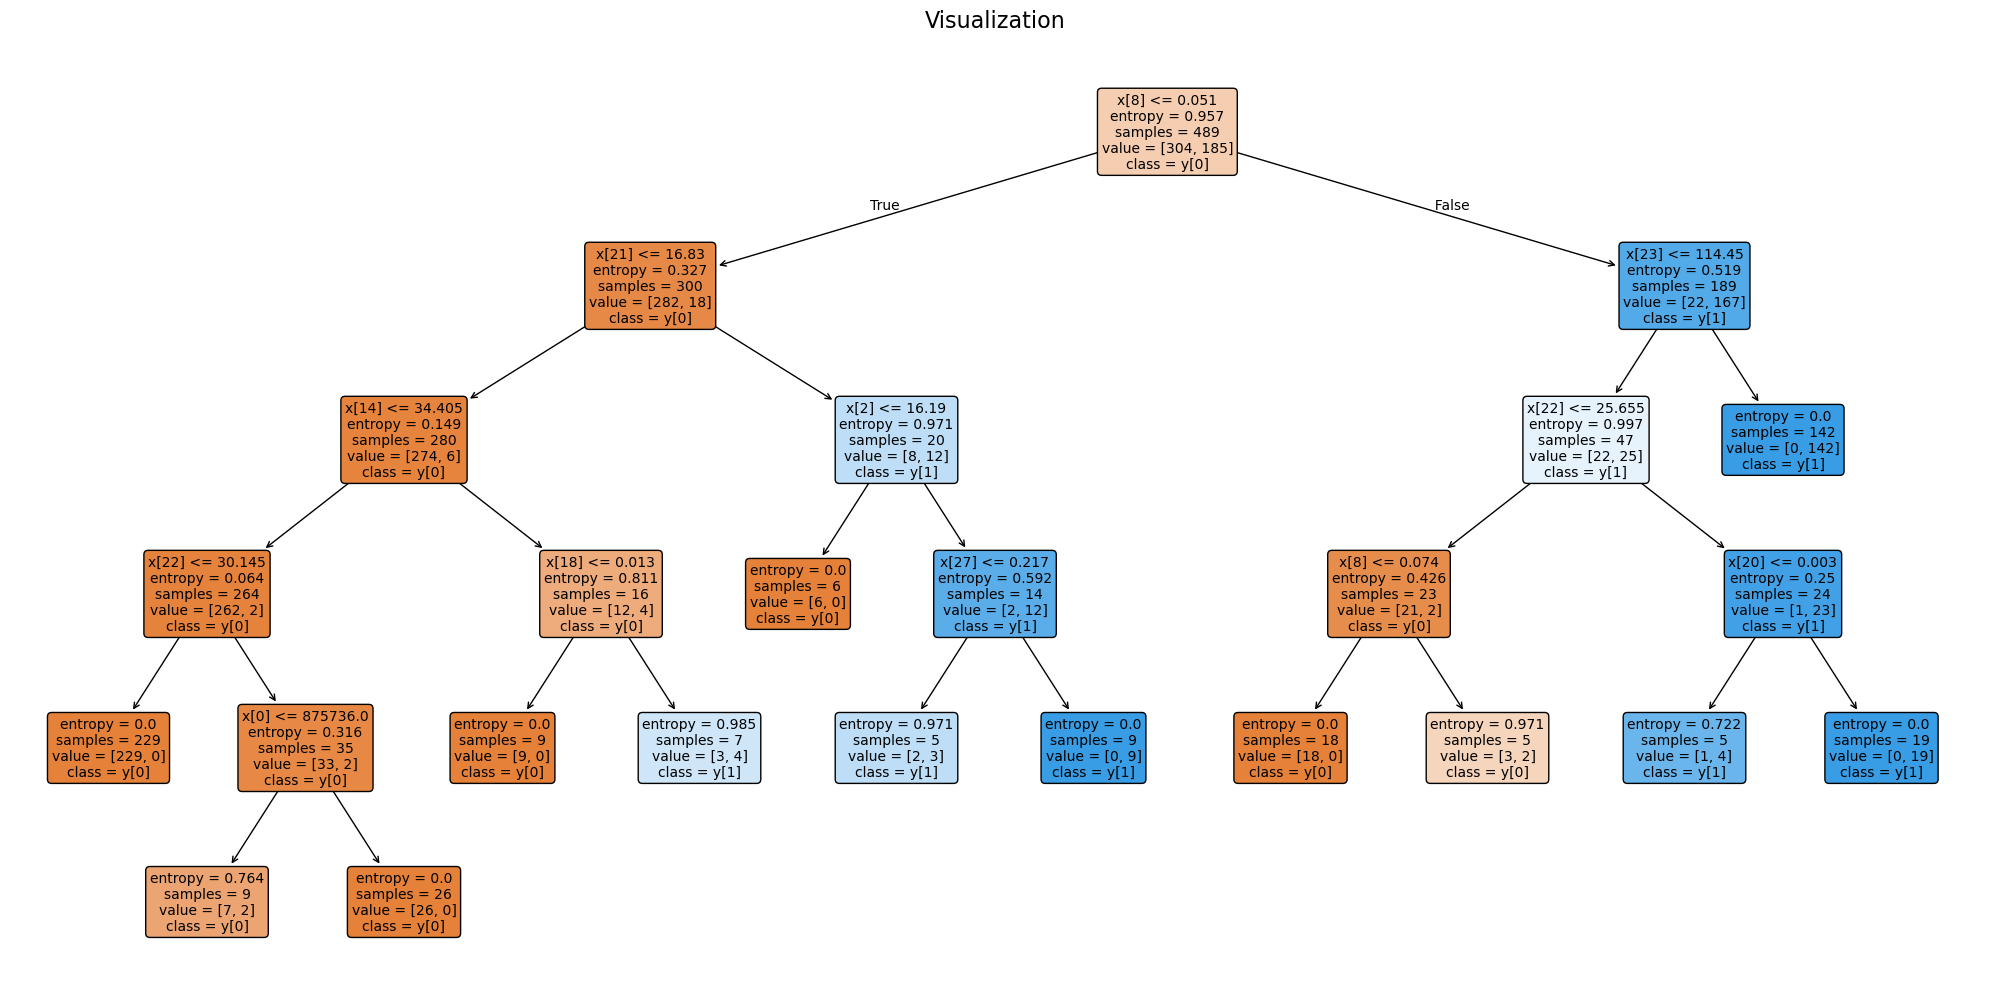

In [76]:
explain_model(model_rs, X_train, X_test, y_train, y_test)

In [77]:
#Again the same as Grid search, results are very good

In [83]:
def objective(trial):
    max_depth = trial.suggest_int("max_depth", 1, 15)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 15)
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"])

    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        random_state=42
    )
    
    score = cross_val_score(model, X_train, y_train, cv=5, scoring="f1_macro").mean()
    return score


In [84]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials = 100)

[I 2026-01-11 00:11:48,572] A new study created in memory with name: no-name-8c401b30-8416-4b6b-af21-cfe53e8ac082
[I 2026-01-11 00:11:48,715] Trial 0 finished with value: 0.9135847511997539 and parameters: {'max_depth': 2, 'min_samples_split': 6, 'min_samples_leaf': 3, 'criterion': 'gini'}. Best is trial 0 with value: 0.9135847511997539.
[I 2026-01-11 00:11:48,850] Trial 1 finished with value: 0.9194617827564067 and parameters: {'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 5, 'criterion': 'log_loss'}. Best is trial 1 with value: 0.9194617827564067.
[I 2026-01-11 00:11:48,969] Trial 2 finished with value: 0.9058413608583369 and parameters: {'max_depth': 11, 'min_samples_split': 11, 'min_samples_leaf': 5, 'criterion': 'gini'}. Best is trial 1 with value: 0.9194617827564067.
[I 2026-01-11 00:11:49,076] Trial 3 finished with value: 0.9152885965985155 and parameters: {'max_depth': 7, 'min_samples_split': 20, 'min_samples_leaf': 14, 'criterion': 'gini'}. Best is trial 1 with

In [85]:
modeloptuna = DecisionTreeClassifier(**study.best_params)

In [86]:
modeloptuna.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=13, min_samples_leaf=6,
                       min_samples_split=18)

Test Results:
              precision    recall  f1-score   support

       False       1.00      0.95      0.97        56
        True       0.89      1.00      0.94        24

    accuracy                           0.96        80
   macro avg       0.94      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80

[[53  3]
 [ 0 24]]
Train Results:
              precision    recall  f1-score   support

       False       0.99      0.97      0.98       309
        True       0.96      0.98      0.97       180

    accuracy                           0.98       489
   macro avg       0.97      0.98      0.98       489
weighted avg       0.98      0.98      0.98       489

[[301   8]
 [  3 177]]
------------------
------------------


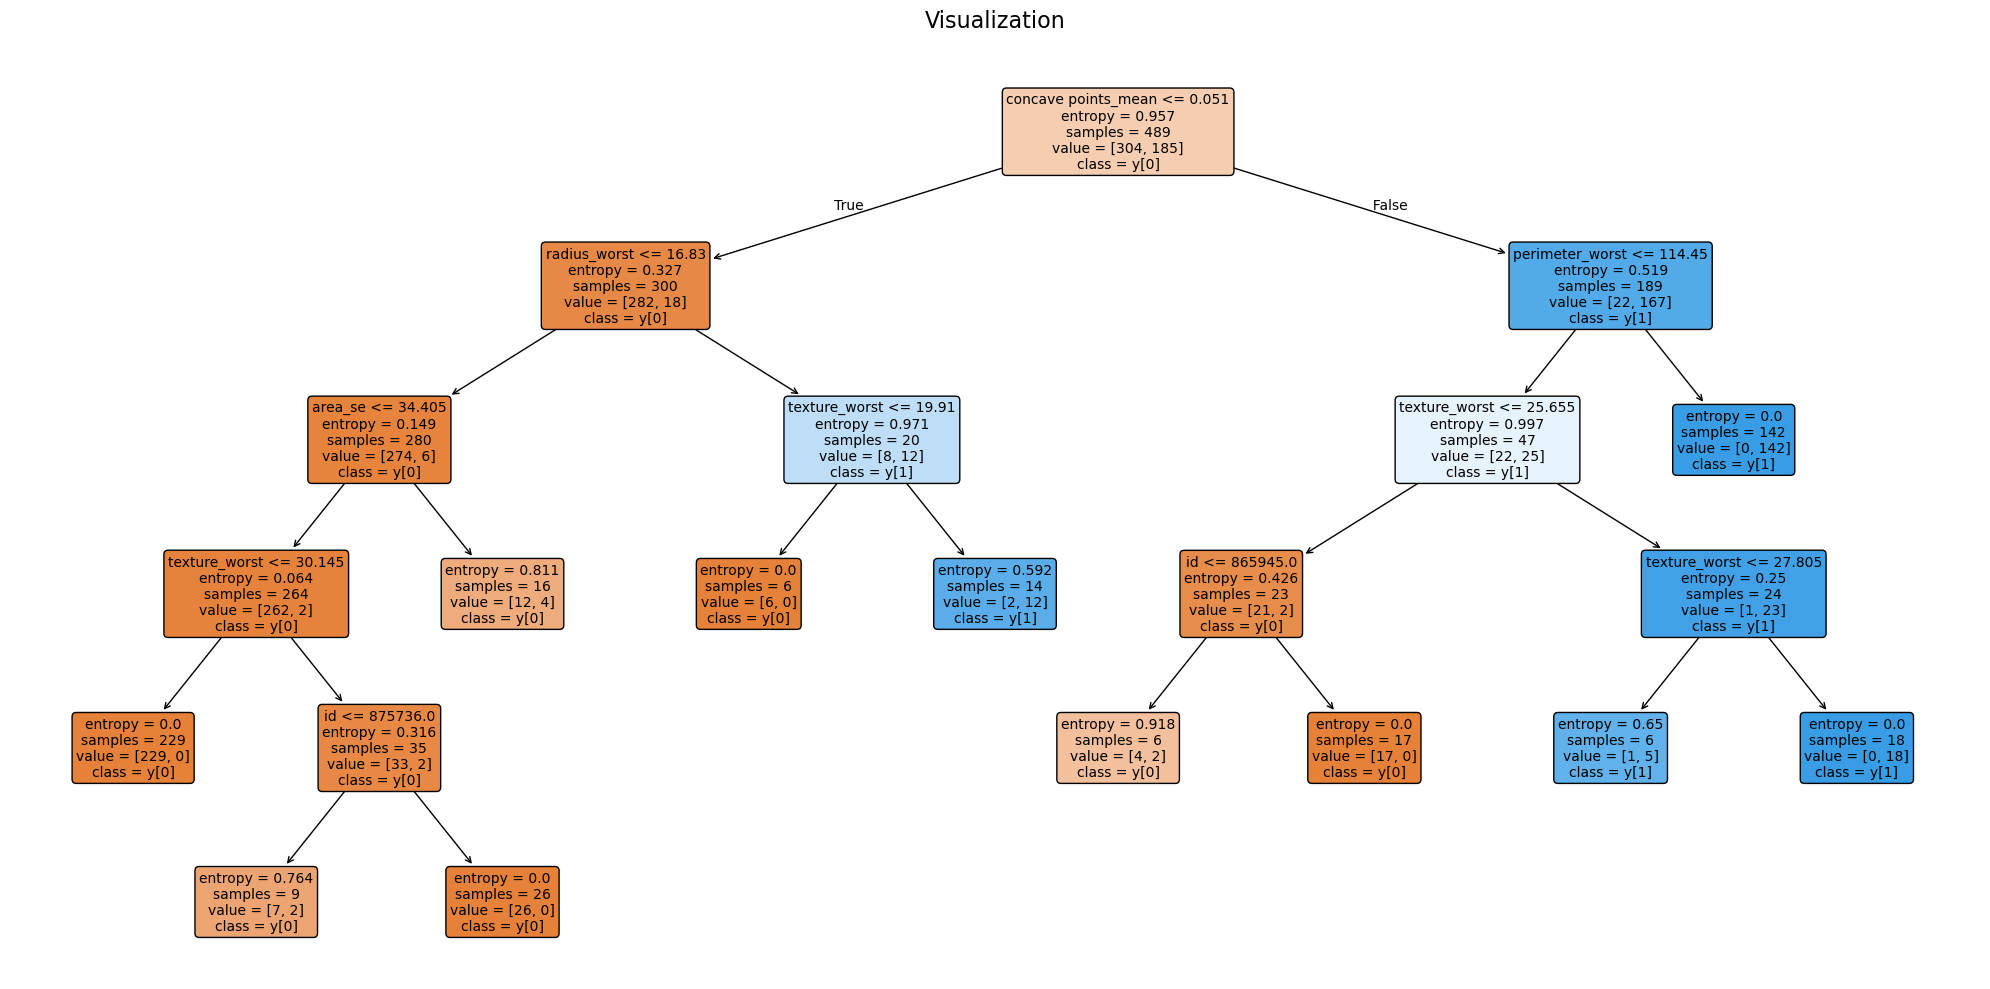

In [87]:
explain_model(modeloptuna,  X_train, X_test, y_train, y_test, features = X_train.columns)

In [88]:
#So i came to conclusion that Optuna and Randomized Search are slightly better than Grid Search

In [89]:
param_dist = {
    "n_estimators": randint(100, 500),
    "max_depth": randint(3, 15),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 10),
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False]
}

model = RandomForestClassifier(random_state=42)

rs = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=65,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

rs.fit(X_train, y_train)
best_model = rs.best_estimator_
explain_model(best_model,  X_train, X_test, y_train, y_test, features = X_train.columns)

Fitting 5 folds for each of 65 candidates, totalling 325 fits
Test Results:
              precision    recall  f1-score   support

       False       0.98      0.96      0.97        54
        True       0.93      0.96      0.94        26

    accuracy                           0.96        80
   macro avg       0.95      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80

[[52  2]
 [ 1 25]]
Train Results:
              precision    recall  f1-score   support

       False       1.00      0.99      1.00       306
        True       0.99      1.00      0.99       183

    accuracy                           1.00       489
   macro avg       0.99      1.00      1.00       489
weighted avg       1.00      1.00      1.00       489

[[304   2]
 [  0 183]]
------------------
------------------


InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got RandomForestClassifier(bootstrap=False, max_depth=10, max_features='log2',
                       min_samples_leaf=3, n_estimators=326, random_state=42) instead.

<Figure size 2000x1000 with 0 Axes>

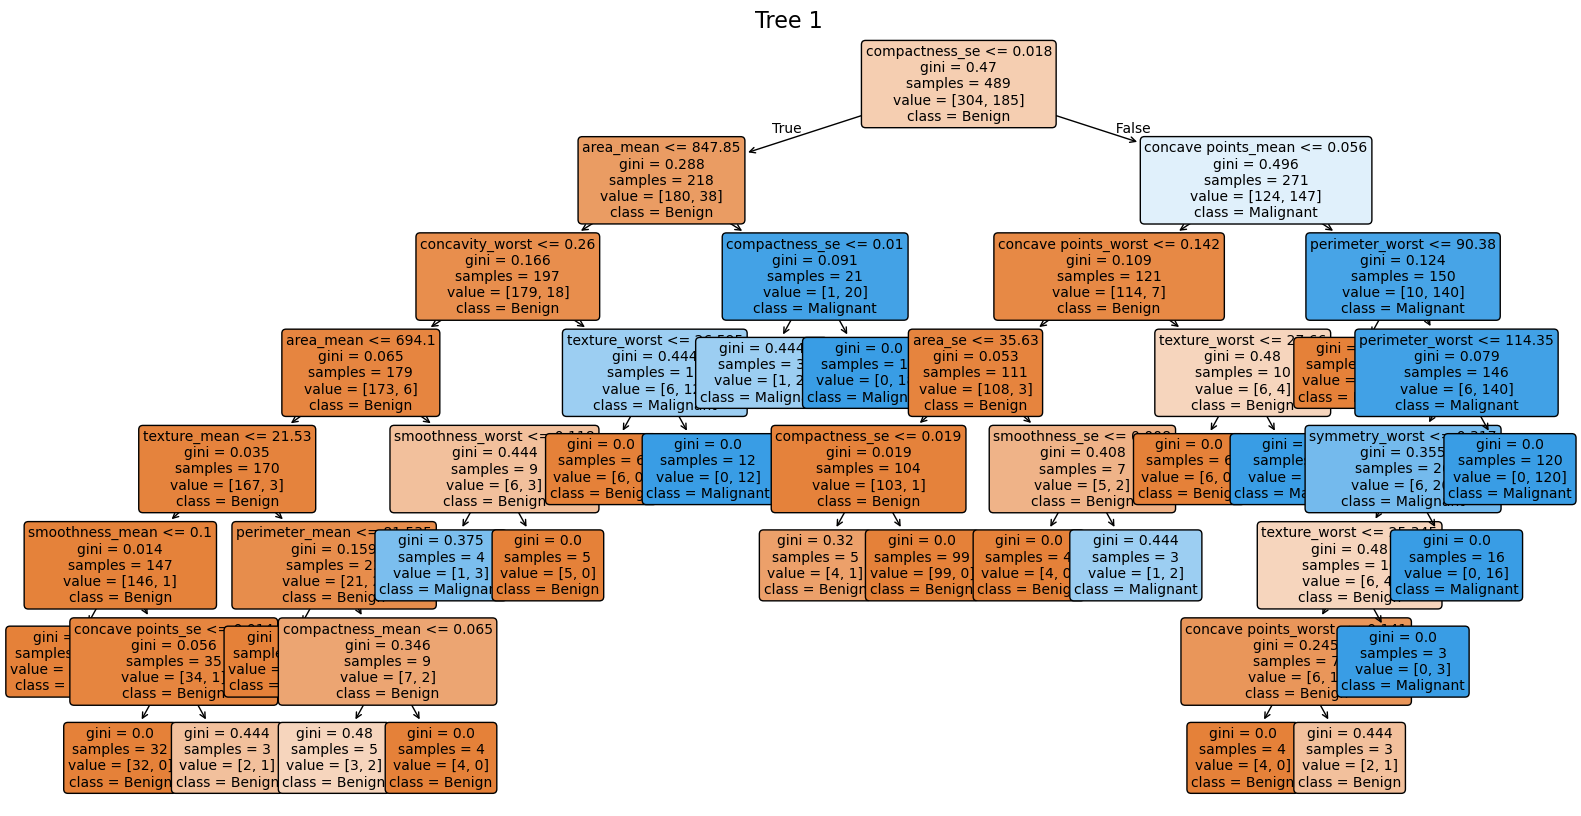

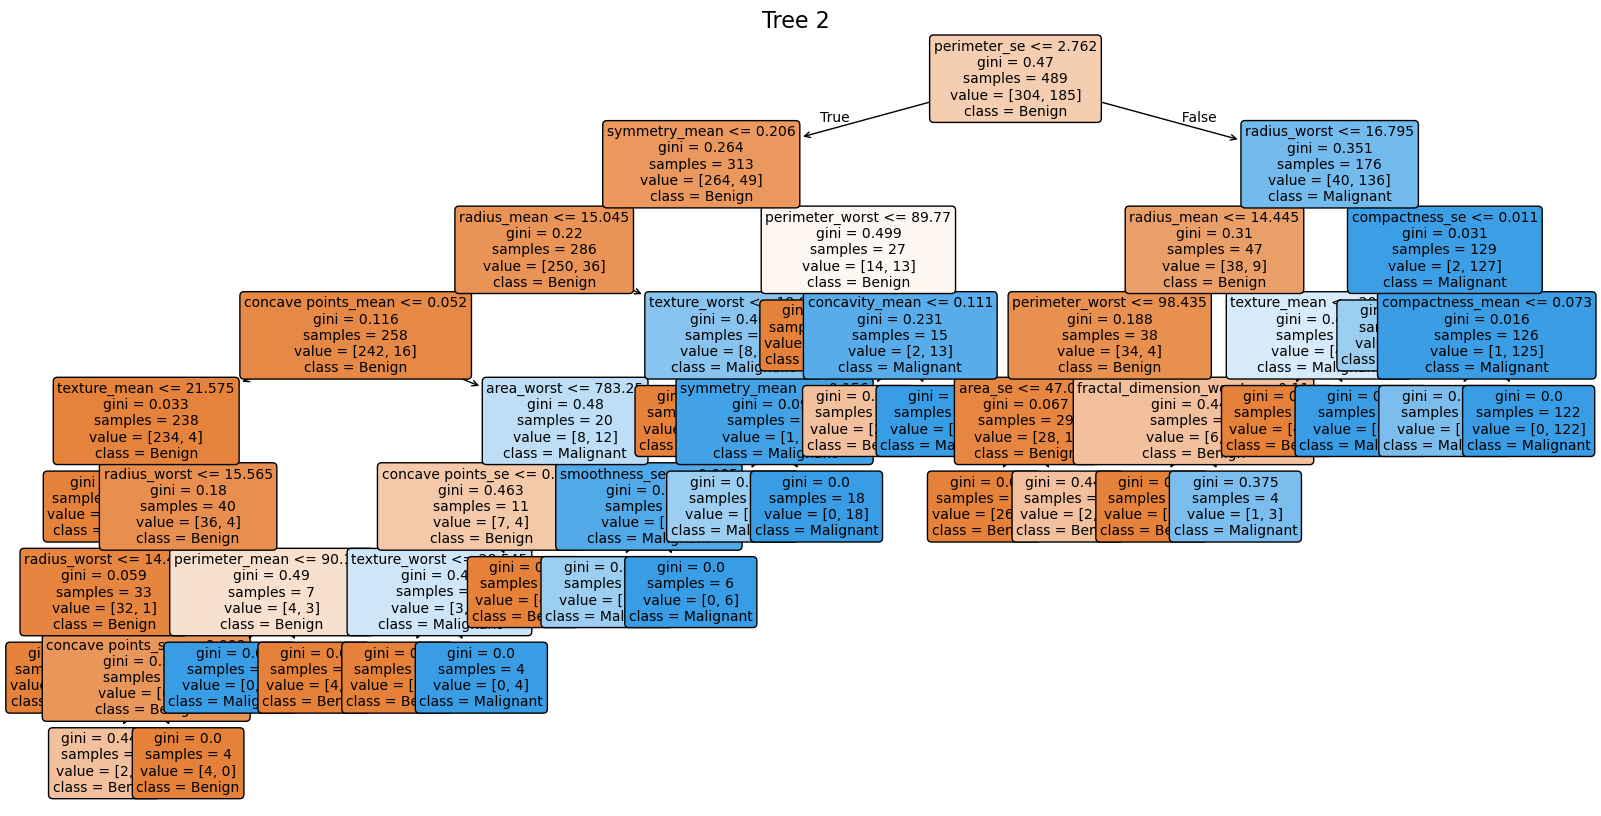

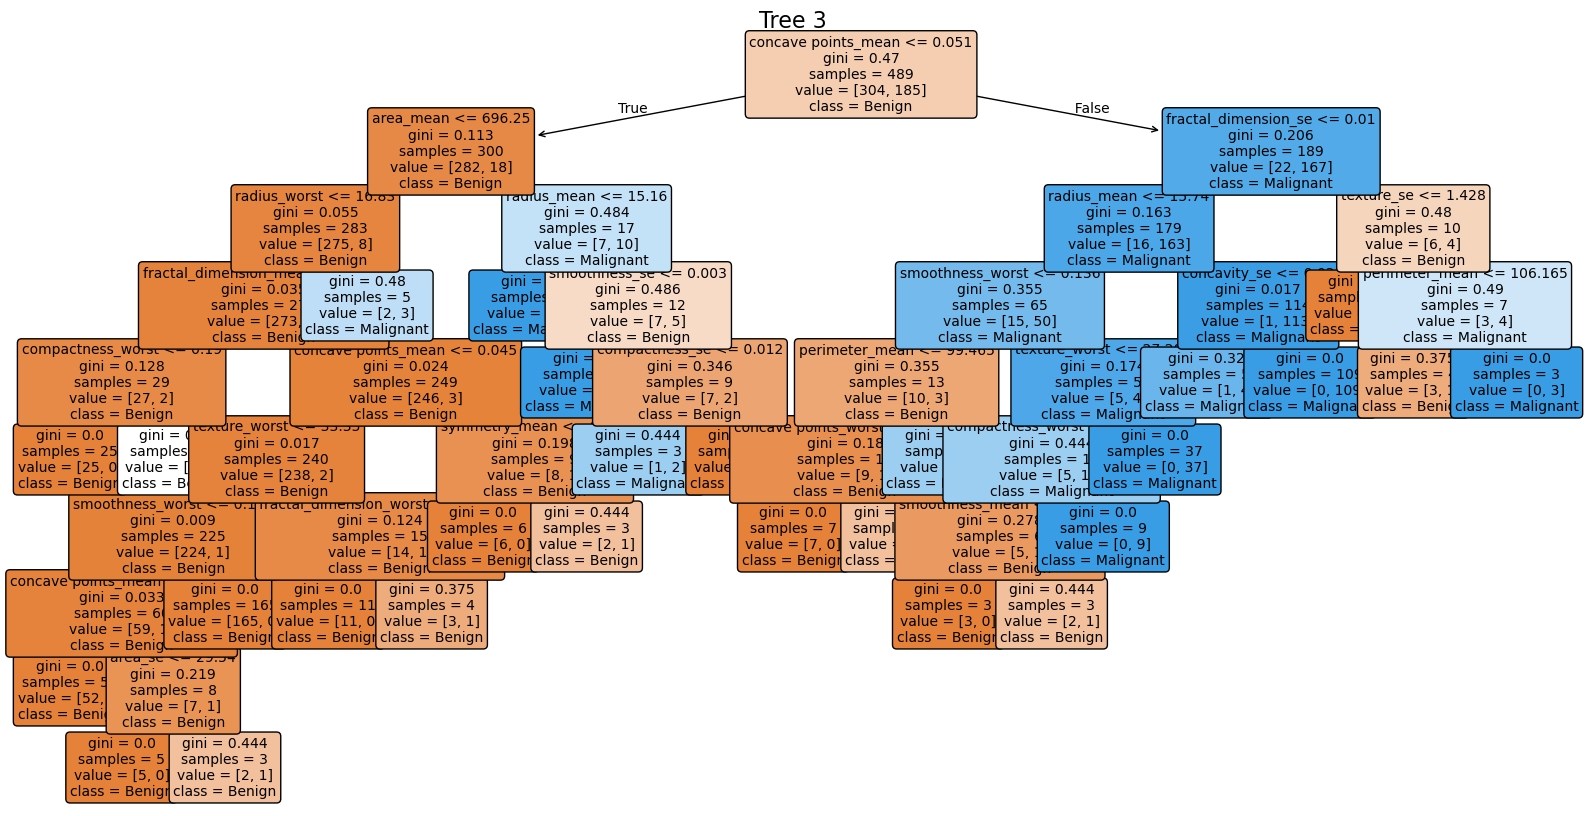

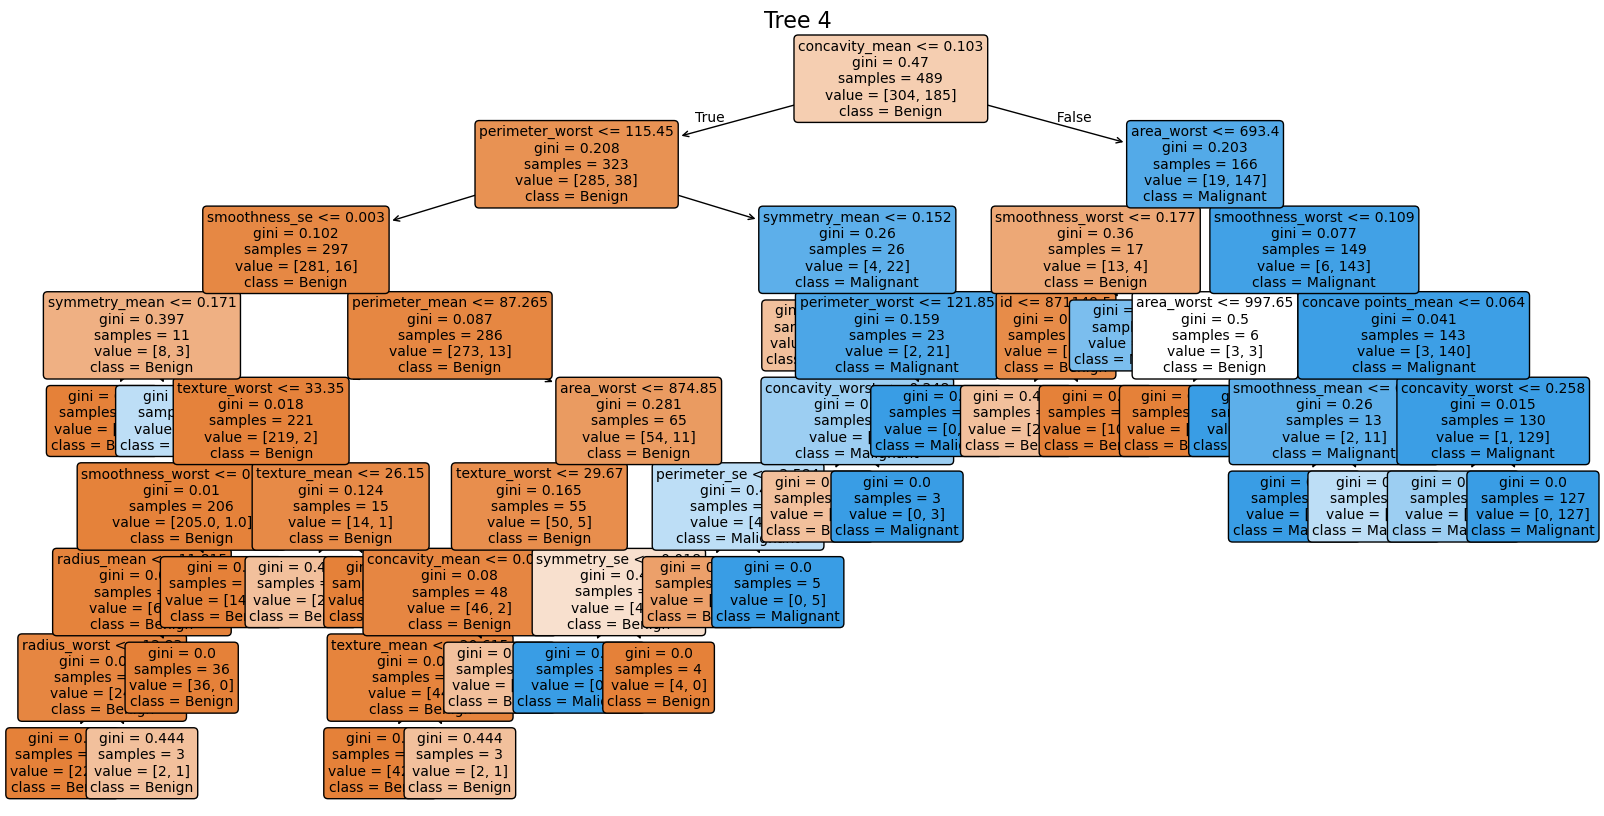

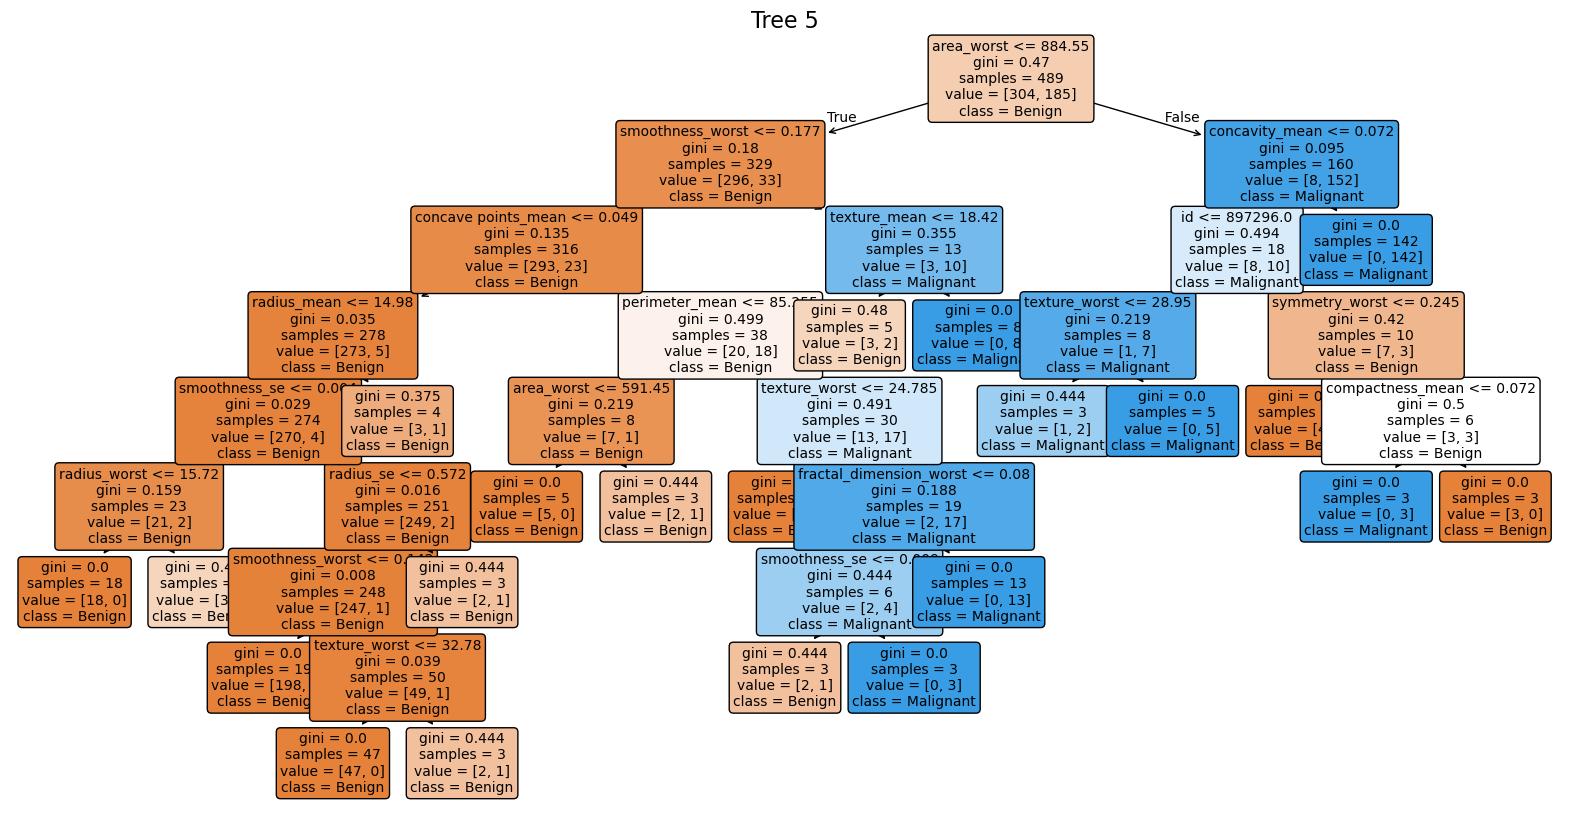

In [90]:
for i, tree in enumerate(best_model.estimators_[:5]):
    plt.figure(figsize=(20,10))
    plot_tree(
        tree,
        filled=True,
        feature_names=X_train.columns,
        class_names=["Benign", "Malignant"],
        rounded=True,
        fontsize=10
    )
    plt.title(f"Tree {i+1}", fontsize=16)
    plt.show()

In [ ]:
#This model is slightly better overall than the prvious models